<a href="https://colab.research.google.com/github/nasirkamal/Scripts/blob/master/TensorFlow_Shakespeare_Style_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Generation in Shakespeare's Style

**Import Dependencies**

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
import numpy as np

**Download Shakespeare Dataset**



In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2019-12-21 08:13:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-12-21 08:13:15 (141 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



**Define Tokenizer and prepare training data**

In [0]:
tokenizer = Tokenizer()

data= open('/tmp/sonnets.txt').read()

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'to': 3, 'of': 4, 'my': 5, 'i': 6, 'in': 7, 'that': 8, 'thy': 9, 'thou': 10, 'with': 11, 'for': 12, 'is': 13, 'love': 14, 'not': 15, 'but': 16, 'a': 17, 'me': 18, 'thee': 19, 'so': 20, 'be': 21, 'as': 22, 'all': 23, 'you': 24, 'his': 25, 'which': 26, 'when': 27, 'it': 28, 'this': 29, 'by': 30, 'your': 31, 'doth': 32, 'do': 33, 'from': 34, 'on': 35, 'or': 36, 'no': 37, 'then': 38, 'have': 39, 'what': 40, 'are': 41, 'if': 42, 'more': 43, 'mine': 44, 'their': 45, 'shall': 46, 'sweet': 47, 'time': 48, 'will': 49, 'they': 50, 'beauty': 51, 'nor': 52, 'eyes': 53, 'art': 54, 'her': 55, 'heart': 56, 'yet': 57, 'o': 58, 'than': 59, 'can': 60, 'should': 61, 'thine': 62, 'now': 63, 'where': 64, 'make': 65, 'one': 66, 'hath': 67, 'he': 68, 'fair': 69, 'still': 70, 'how': 71, 'eye': 72, 'him': 73, 'like': 74, 'true': 75, 'see': 76, 'am': 77, 'she': 78, 'those': 79, 'though': 80, 'being': 81, 'some': 82, 'every': 83, 'such': 84, 'own': 85, 'were': 86, 'dost': 87, 'who': 88, 'liv

In [0]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(len(input_sequences))

#pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])

print(max_sequence_len, total_words)

input_sequences = np.array(pad_sequences(input_sequences, padding='pre', maxlen=max_sequence_len))

#create predictors and labels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


15462
11 3211


**Define the Model Architecture and start training**

In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(20))
model.add(Dense(total_words, activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
lstm (LSTM)                  (None, 20)                9680      
_________________________________________________________________
dense (Dense)                (None, 3211)              67431     
Total params: 398,211
Trainable params: 398,211
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (N

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(xs, ys, epochs=100, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 13s 841us/sample - loss: 6.9561 - acc: 0.0225
Epoch 2/100
15462/15462 [==============================] - 11s 728us/sample - loss: 6.5093 - acc: 0.0202
Epoch 3/100
15462/15462 [==============================] - 11s 723us/sample - loss: 6.4448 - acc: 0.0221
Epoch 4/100
15462/15462 [==============================] - 11s 697us/sample - loss: 6.4034 - acc: 0.0234
Epoch 5/100
15462/15462 [==============================] - 11s 683us/sample - loss: 6.3635 - acc: 0.0270
Epoch 6/100
15462/15462 [==============================] - 11s 711us/sample - loss: 6.3222 - acc: 0.0329
Epoch 7/100
15462/15462 [==============================] - 10s 655us/sample - loss: 6.2776 - acc: 0.0350
Epoch 8/100
15462/15462 [==============================] - 11s 707us/sample - loss: 6.2343 - acc: 0.0377
Epoch 9/100
15462/15462 [==================

**Plot the accuracy graph over epochs**

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()



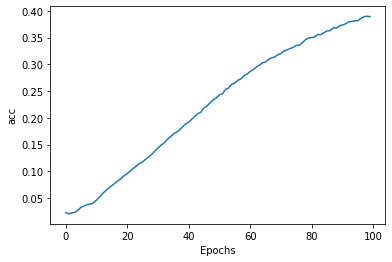

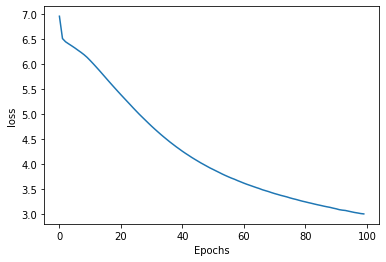

In [0]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

We can see that the accuracy improves with every epoch. We train over 100 epochs and reach around 80 percent accuracy

**Save the model**

In [0]:
model.save('shakespeare_model.h5')


**Generate 100 next words with an initial sample sentence**

In [0]:

def predict_next_words(seed_text, next_words):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word

  print(seed_text)
  return seed_text

In [0]:
seed_text = "from fairest creatures we desire increase"
next_words = 100


generated_text = predict_next_words(seed_text, next_words)

from fairest creatures we desire increase scope affords affords thrall frame yield plead frame habit urge sit untutor'd plead reasons unthrifts work's revenues knowledge perfumes guest former break green telling leaves light light room eased arising sees refigured blessings measure could yet i am i not be my heart to me confounds sweetness tell me express crime grow mad increase new express scope tend grow mad while whatsoever while heaven's gate triumph comes frame yield alter pray taste bow deem'd strong adulterate wilful sway strengthseem worthiness there's shalt lose their part acquainted green end bounteous rotten bait defaced defaced benefit determinate lawful impair alter tallies telling


In [0]:
seed_text = "why lovest thou that which thou receivest not gladly,"
generated_text = predict_next_words(seed_text, next_words)

why lovest thou that which thou receivest not gladly, gladly change things life dead brow new lack lie to my life still doth some cross ' bred another youth their night ' still doth date rage of life but therein quite gone straight lack dead face dead young thee hour mine eye some ill alone doth stay thy hate must care you moan still o'er hell or woe remain new fire ' must do bring all rest fitted tongue forgot thus three near contents stay your place must seen have near forth o'er truth still truly dwell to groan things tend ill doth hide to thee in me bring
